In [1]:
#from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *

import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from libs.InteractivePitchUI import InteractivePitch, PitchDisplay

from mplsoccer import *
import pandas as pd
import numpy as np
import os
# Click player into the pitch and take those player and apply Ripleys K to them. And then maybe PCA


/home/martin/.local/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (None)/charset_normalizer (2.1.0) doesn't match a supported version!
  warnings.warn(


In [2]:
# Step 6: Extract match data from tracking data
data = compile_team_tracking_data("data", "Denmark")
#data = calculate_possession(data)
#data = data[data["Possession"] == "Home"]

#print(data.head())
one_match = extract_one_match(data, 4)


AttributeError: 'InteractivePitch' object has no attribute 'interval_length_choser'

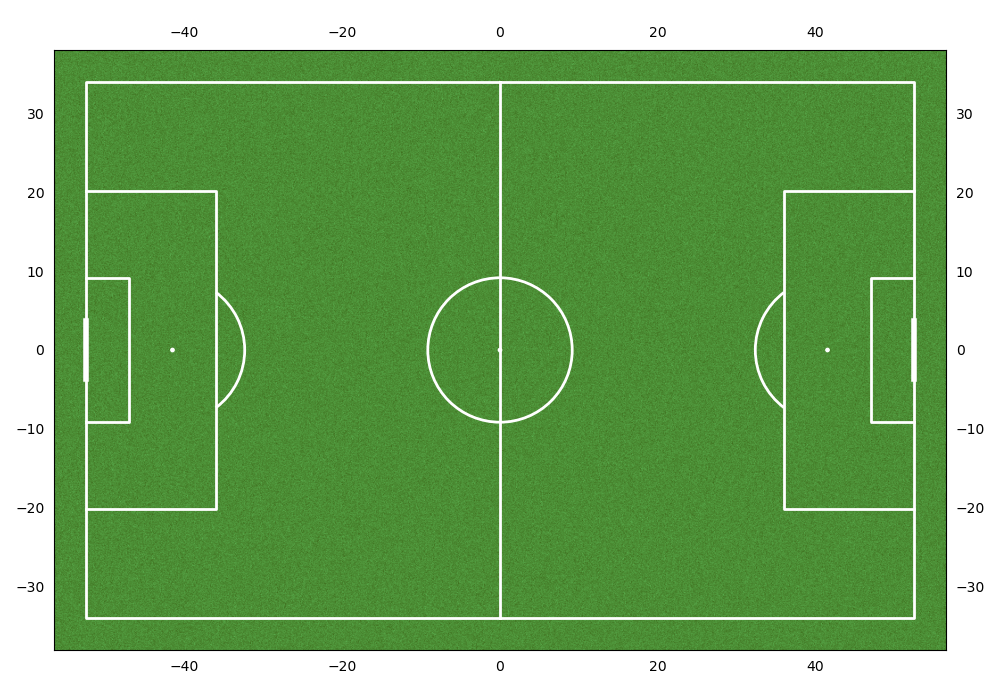

In [3]:
%matplotlib widget

interactive_pitch = InteractivePitch(one_match)


In [6]:
index_displayer = PitchDisplay(one_match,interactive_pitch.similar_situation_indices)

In [8]:
from libs.similar_movement import *


distance_index_list =find_similar_movement_given_vector(one_match, interactive_pitch.vectors[0], interactive_pitch.similar_situation_indices[:100] ) #find_similar_movement(one_match,,interactive_pitch.similar_situation_indices[:100])

In [9]:
print(distance_index_list)

[(4683.239578378611, 218208), (4932.910895329151, 120816), (6136.158273479492, 242064), (5554.688468465564, 57408), (6116.137587674855, 454800), (4484.568295110301, 218256), (5033.9072581535975, 195648), (5538.549552869521, 48480), (6258.710934921566, 132432), (5294.110722503281, 448704), (5761.14283320303, 282720), (5028.57223912088, 38688), (6369.855752147353, 431040), (5709.774811889002, 120768), (4898.592006187432, 48528), (5105.439345079709, 530544), (4450.350708036628, 120864), (3515.542898531442, 309504), (4216.646407409177, 432624), (6554.152826713617, 232464), (5841.977234986971, 158496), (5026.947217479397, 195600), (4270.286454144607, 158544), (4395.938341107871, 442944), (5910.1840857532225, 445488), (1951.2289472664213, 388224), (5400.870864817008, 478512), (2995.7043912304766, 217344), (5547.387807789962, 120672), (5818.583370802528, 120720), (2471.221947899762, 217392), (6696.25295427347, 431376), (2830.4921257762344, 268512), (5771.554079063577, 442992), (5443.210681355

In [10]:
distance_index_list = sorted(distance_index_list, key = lambda x : x[0])

In [11]:
print(len(distance_index_list))

98


In [12]:
index_displayer_2 = PitchDisplay(one_match, [index for (_,index) in distance_index_list])